<a href="https://colab.research.google.com/github/dishant26/MLnow_2.0/blob/main/03_LinearRegression/3_1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

In [4]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ML Girlscript/EDA/student.zip")
zip_ref.extractall("/content/tmp")
zip_ref.close()

In [5]:
df = pd.read_csv("/content/tmp/student-mat.csv", sep=';')
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [6]:
uniDF = df[['G1', 'G3']]
uniDF.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


## Data visualization

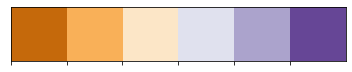

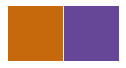

In [7]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [8]:
uniDF.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

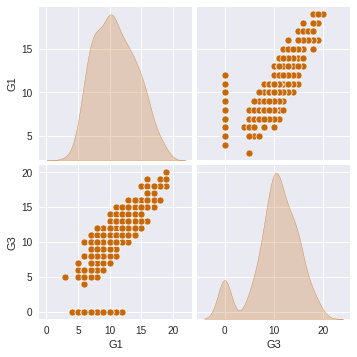

In [9]:
#pairplot for all the values

sns.pairplot(uniDF,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [10]:
#80-20 train-test percent split

trainDataset = uniDF.sample(frac=0.8, random_state=0) 
testDataset = uniDF.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [11]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [12]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [13]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [14]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [59]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [60]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [61]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 17ms/step - loss: 8.7494 - mae: 8.7494 - mse: 89.3928 - val_loss: 8.8110 - val_mae: 8.8110 - val_mse: 89.2662
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 8.1911 - mae: 8.1911 - mse: 77.8440 - val_loss: 8.1921 - val_mae: 8.1921 - val_mse: 76.5624
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 7.6298 - mae: 7.6298 - mse: 66.8031 - val_loss: 7.5765 - val_mae: 7.5765 - val_mse: 64.9736
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 7.0615 - mae: 7.0615 - mse: 56.8493 - val_loss: 6.9908 - val_mae: 6.9908 - val_mse: 54.9103
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 6.5344 - mae: 6.5344 - mse: 48.3778 - val_loss: 6.3919 - val_mae: 6.3919 - val_mse: 45.6012
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 5.9909 - mae: 5.9909 - mse: 40.4073 - val_loss: 5.7844 - val_mae: 5.7844 - val_mse: 37.1634
Epoch 7/3

In [62]:
print(history)

In [63]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


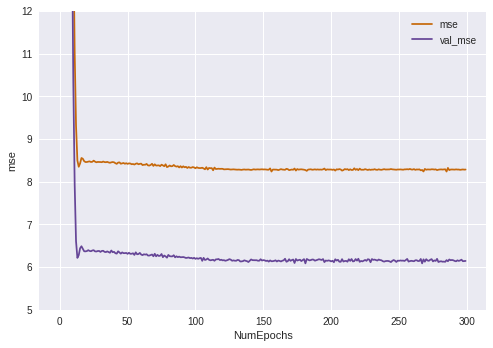

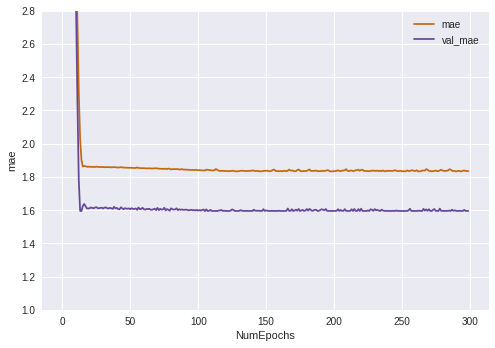

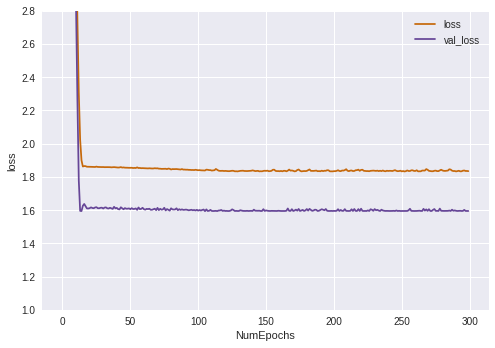

In [64]:
# tempString = 'mse'
def curvePlots(tempString, ymin, ymax):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  axes = plt.gca()
  axes.set_ylim([ymin,ymax])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse', 5, 12)
curvePlots('mae', 1, 2.8)
curvePlots('loss', 1, 2.8)

In [65]:
model.predict([1])

array([[1.0087146]], dtype=float32)

In [66]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0087146]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0087146]
 [2.0073342]
 [3.0053487]
 [4.003205 ]
 [5.001061 ]]

List of Predictions (flattened out):
[1.0087146 2.0073342 3.0053487 4.003205  5.001061 ]



In [67]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [68]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [69]:
print(len(testPreds))
print(testPreds)

79
[13.981768   5.9989176 10.988199  16.975336  16.975336  11.986055
 13.981768  18.971048  18.971048   7.99463   13.981768  12.983911
  7.99463    6.9967737  8.992486  12.983911  10.988199  15.97748
  6.9967737  9.990343  14.979625  12.983911  13.981768  15.97748
  6.9967737  6.9967737  7.99463    9.990343  11.986055   9.990343
 11.986055  12.983911   9.990343   5.9989176  8.992486  11.986055
  6.9967737  7.99463   13.981768   8.992486   8.992486   6.9967737
 11.986055   5.9989176 12.983911   6.9967737  6.9967737 10.988199
 12.983911  16.975336  11.986055  14.979625   8.992486  11.986055
 14.979625  11.986055  14.979625  11.986055  14.979625  10.988199
 11.986055   7.99463   15.97748    6.9967737 15.97748   10.988199
 15.97748   12.9839115  7.9946303  7.9946303 11.986056  17.973194
 12.9839115 15.97748    9.990343   6.9967737  9.990343   6.9967737
 10.988199 ]


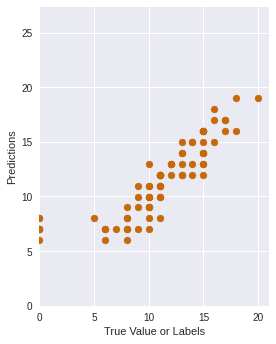

In [70]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

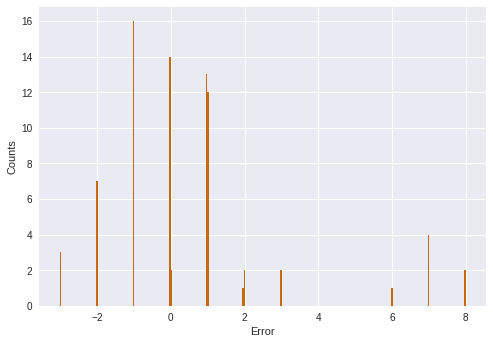

In [71]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions